# Pilot for Pyswarms

In [2]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np
from cerebrum_0130 import utils, datainsights as di
from collections import namedtuple

### Get Input

In [3]:
df = pd.read_csv('data/pyswarms_sample_1.csv')
print('DATA:')
print('Shape:', df.shape)
print('Columns:', df.columns.to_list())
print('-'*100)

DATA:
Shape: (46, 19)
Columns: ['i', 'e', 'g', 'cos_g', 'w', 'b', 'c', 'cos_i', 'cos_e', 'p_g', 'K', 'gamma', 'r0', 'cos_i_k', 'cos_e_k', 'h_mu_0', 'h_mu', 'refl', 'wave']
----------------------------------------------------------------------------------------------------


In [4]:
df.head()

,i,e,g,cos_g,w,b,c,cos_i,cos_e,p_g,K,gamma,r0,cos_i_k,cos_e_k,h_mu_0,h_mu,refl,wave
0,10,85,-75,0.258819,0.82,0.8,0.2,0.984808,0.087156,1.127151,1.114818,0.424264,0.404234,0.883380,0.205428,1.590295,1.238203,0.142257,0.7
1,15,85,-70,0.342020,0.82,0.8,0.2,0.965926,0.087156,1.208709,1.114818,0.424264,0.404234,0.866442,0.205428,1.584411,1.238203,0.149938,0.7
2,20,85,-65,0.422618,0.82,0.8,0.2,0.939693,0.087156,1.291676,1.114818,0.424264,0.404234,0.842911,0.205428,1.576076,1.238203,0.158915,0.7
3,25,85,-60,0.500000,0.82,0.8,0.2,0.906308,0.087156,1.375000,1.114818,0.424264,0.404234,0.812965,0.205428,1.565191,1.238203,0.169370,0.7
4,30,85,-55,0.573576,0.82,0.8,0.2,0.866025,0.087156,1.457558,1.114818,0.424264,0.404234,0.776831,0.205428,1.551625,1.238203,0.181546,0.7


In [6]:
def check_dq(df, dq_insights_file):
    #Add hash
    df = utils.add_hash(df, 'key')

    # DQ Validation:
    dqp = di.get_data_quality(df,dq_insights_file)

    n_wave = df.wave.to_numpy()
    n_refl = df.refl.to_numpy()
    i_array = df.i.to_numpy()
    e_array = df.e.to_numpy()
    g_array = df.g.to_numpy()
    min_wave, max_wave = n_wave.min(), n_wave.max()

    return df, dqp, n_wave, n_refl, i_array, e_array, g_array, min_wave, max_wave

In [7]:
dq_insights_file = 'cerebrum_0130/dq_insights.csv'
df, dqp, n_wave, n_refl, i_array, e_array, g_array, min_wave, max_wave = check_dq(df, dq_insights_file)


#### Show Data Insights

Workspace Data
````````````````````````````````````````````````````````````````````````````````````````````````````
        var         |       value        |        min         |        max         
        wave        |         46         |        0.7         |        0.7         
        refl        |         46         |        0.12        |        0.23        
      i_unique      |         13         |         10         |         70         
      e_unique      |         34         |        -85         |         85         
      g_unique      |         46         |        -75         |        155         
----------------------------------------------------------------------------------------------------
Data Quality
````````````````````````````````````````````````````````````````````````````````````````````````````
                                   Info                                    |                      Result                      
                      Data Quality on 

<AxesSubplot:xlabel='Phase', ylabel='refl'>

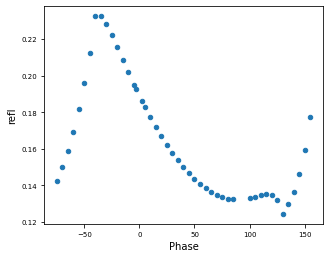

In [9]:
wsdata = []
itable = namedtuple('itable',['var','value','min','max'])
wsdata.append(itable('wave',  n_wave.shape[0], round(min_wave,2), round(max_wave,2)))
wsdata.append(itable('refl',  n_refl.shape[0], round(n_refl.min(),2), round(n_refl.max(),2)))
wsdata.append(itable('i_unique',  int(dqp['i_count']), int(round(i_array.min(),2)), int(round(i_array.max(),2))))
wsdata.append(itable('e_unique',  int(dqp['e_count']), int(round(e_array.min(),2)), int(round(e_array.max(),2))))
wsdata.append(itable('g_unique',  int(dqp['g_count']), int(round(g_array.min(),2)), int(round(g_array.max(),2))))

dq = namedtuple('dq',['info','result'])
dq_results = []
dq_results.append(dq('Data Quality on Wave(nm) - wave', dqp['wave_scenario']))
dq_results.append(dq('Data Quality on Incident Angle(deg) - i', dqp['incident_angle_scenario']))
dq_results.append(dq('Data Quality on Emission Angle(deg) - e', dqp['emmission_angle_scenario']))
dq_results.append(dq('Data Quality on Phase Angle(deg) - g', dqp['phase_angle_scenario']))
dq_results.append(dq('Data Quality on Opp. Surge', dqp['opp_surge_scenario']))
dq_results.append(dq('Data Quality on Shadow Hiding - Bs', dqp['ext_bs_scenario']))
dq_results.append(dq('Data Quality on Coherence Ratio - Bc', dqp['ext_coh_ratio_scenario']))
dq_results.append(dq('Data Quality on Phase Angle Coverage (Need more than 27 percent filled)', dqp['g_covg']))
dq_results.append(dq('Preprocess: Can crop?', dqp['scene'].pp_crop.values[0]))
dq_results.append(dq('Total Unique i,e,g combinations', dqp['all_angles_cnt']))
dq_results.append(dq('Data Process Satus Reccommendation', dqp['process_status']))

print('='*100)
print('Workspace Data')
print('`'*100)
row = "{name1:^20}|{name2:^20}|{name3:^20}|{name4:^20}".format
print(row(name1='var', name2='value', name3='min', name4='max'))
for tup in wsdata:
    print(row(name1=tup[0], name2=tup[1], name3=tup[2],name4=tup[3]))
print('-'*100)
print('Data Quality')
print('`'*100)
row = "{name1:^75}|{name2:^50}".format
print(row(name1='Info', name2='Result'))
for tup in dq_results:
    print(row(name1=tup[0], name2=tup[1]))
print('='*100)

df.plot('g', 'refl','scatter',figsize=(5,4), fontsize=7, xlabel='Phase')


### Calculate Model Reflectance

- Need all variables
- Missing Bc0, Bs0
- To calculate Bc, Bs - need hc, hs
- Need interpretation of below: what is Dmin, Dmax or is it any other surface
- hs = (3 * (3**1/2)/8) * ((PoreK * ff)/np.log(D_min/D_mx)
- in any other surface:: hs = (3* PoreK * ff / 8)

- What are the vars in path
- hc = (lamda / 4 * math.pi * path)
- path = [PoreK*N*σ*QS(1−ξ)]−1
- path = (2/3)(D/(PoreK*ff*Qs(1-ξ)))

In [ ]:
#variables that have upper and lower bounds = w, b, c
#calc_refl = w/4pi * (1/(mu0 + mu)) *(Pg * H(mu0) * H(mu) - 1)
# w/4pi = refl/(1/(mu0 + mu)) *(Pg * H(mu0) * H(mu) - 1)
# w = refl*4pi/ (1/(mu0 + mu)) *(Pg * H(mu0) * H(mu) - 1)

# calc_refl = w/4pi * (1/(cosi + cose))* (Pg * H(cosi) * H(cose) -1)
def get_fn_constants(df):
    mu_i = np.cos(df.i_rad)
    mu_e = np.cos(df.e_rad)
    cosg = np.cos(df.g_rad)
    
    H_mu_i = (1 + 2*mu_i) / (1 - 2*mu_i)
    H_mu_e = (1 + 2*mu_e) / (1 - 2*mu_e)

    t2 = mu_i / (mu_i + mu_e)
    t3 = (H_mu_i * H_mu_e)-1
    
    return cosg, t2, t3

def hapke_invert():
    #simplified hapke model that can be mathematically inverted for w
    w_guess = (refl*4*math.pi) 

    return w_guess


data_cnt=len(data)
w=np.zeros(data_cnt)





def small_hapke(w,b,c,cosg,t2,t3):
    t1 = w/(4*math.pi)
    Pg = 1 + (b * cosg) + c * (1.5 * (cosg)**2 - 0.5)
    cal_refl = (t1 * t2 * (Pg + t3))
    return cal_refl

def obj_fcn(calc_refl, refl):
   loss += ((rc - actual)**2).sum() 


In [ ]:
 #The bounds for Legendre Function - -1.7 <= b <= 1.7, -1 <= c <= 2
#bguess = 0.5
#cguess = 0.2
#lowerbound w = w_guesw-0.2
#upperbound w = wguess +0.2

#do constraints have fuzzy logic?
#can constrains be made to have the deviation in w be less than the deviation in b from some point? Like a min deviation? or (b[i]-b[i+1])/b[i] < (w[i]-w[i+1])/w[i] how do you scale that to percent?


In [ ]:
from pyswarms import pso

#assume x[0] - w and x[1] b and x[2] is c

def banana(x):

    w=x[0]
    b=x[1]
    c=x[2]


    #sum lsqs all data - all model
    #df.rc will have to be a numpy array, which means it has to be
    return np.sum(np.sqrt((cal_refl-refl)**2),axis=1)

def con(x):

